In [2]:
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

import pymongo
import pandas as pd
import numpy as np
import os.path

from pymongo import MongoClient
from processing import *
from IPython.display import Image
from IPython.display import clear_output


In [3]:
client = MongoClient('mongodb://192.168.0.104:27017/')
db = client.geometry
objects = db.objects
files = db.files

In [4]:
files.find({'Valid':True}).count()

/home/mk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


3816

In [5]:
#fileidsWithDims = objects.find({'ClassName':'AcDbRotatedDimension'}).distinct('FileId')[:5]
fileIds = files.find({
    'Valid':False,
    'Checked':{'$ne':True}
}).distinct('FileId')
len(fileIds)

17370

In [6]:
# https://stackoverflow.com/questions/13710770/how-to-update-values-using-pymongo
def set_fileId_valid(collection, fileId, valid):
    print('updating ',fileId, 'set valid:', valid)
    collection.update_many(
        {
            'FileId':fileId
        },
        {
            '$set':{
                'Valid':valid,
                'Checked':True
            }
        },
        upsert = False)

id: 881910ff-56a8-4cfc-9369-2434c6f55352 entities: 450


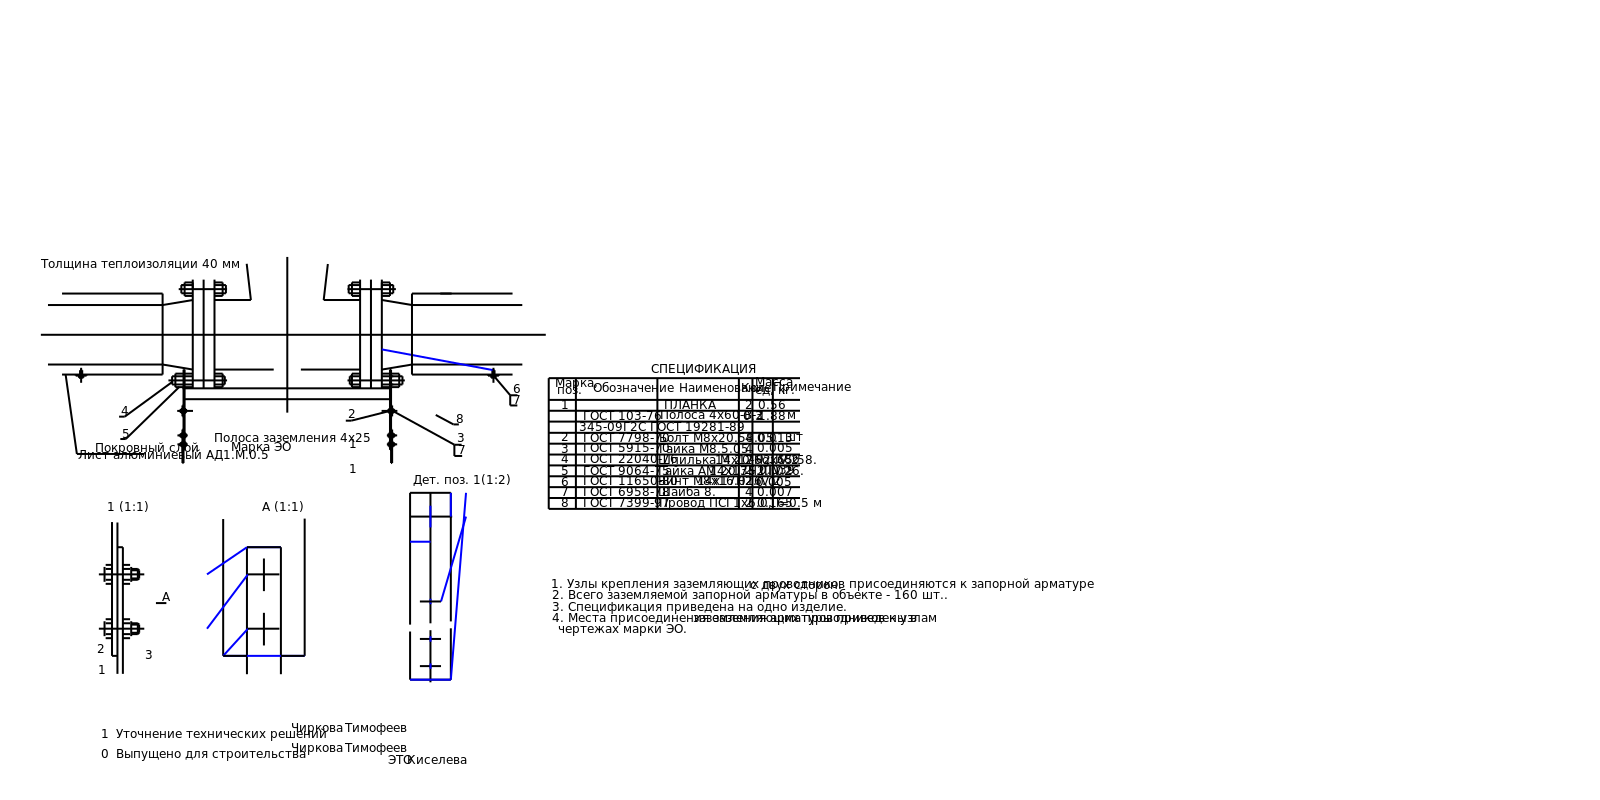

In [ ]:
for fileid in fileIds:
    valid = False
    
    filename = generate_image_by_id(objects, fileid)
    
    if os.path.exists(filename):
        display(Image(filename))  
        
        # request manual imput of file assesment
        # if it is valid or not
        valid = input() == '1'
        
    set_fileId_valid(files, fileid, valid)
    
    clear_output(wait=True)